In [1]:
# import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing

In [2]:
df = pd.read_csv("playlist.csv")

In [3]:
# Clearing rows with NaN values
df.dropna(subset=['Artist Genres'], inplace=True)

In [4]:
df

,Track Name,Artist,Artist URI,Artist Popularity,Artist Genres,Track Duration(ms),Release Date,Track Popularity
0,Pump It Up,Elvis Costello & The Attractions,spotify:artist:4qmHkMxr6pTWh5Zo74odpH,49,"art rock, heartland rock, new romantic, new wa...",196680,1978-01-01,0
1,Alison Hell,Annihilator,spotify:artist:0L8QRAAuWjqvTM8FpQ1gYO,44,"canadian metal, death metal, metal, old school...",301053,1989,50
2,Kiss Me More (feat. SZA),Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,86,"dance pop, pop",208666,2021-06-25,82
3,Wildfire,SBTRKT,spotify:artist:1O10apSOoAPjOu6UhUNmeI,47,"chillwave, electronica, future garage, indie s...",201000,2011-06-27,0
4,Steppin' Out,Joe Jackson,spotify:artist:6KOqPxwfNAmZPkiCnDE9yT,50,"mellow gold, new romantic, new wave, new wave ...",268200,1982-01-01,54
...,...,...,...,...,...,...,...,...
9891,Is It Really You?,Loathe,spotify:artist:4G9wSdX0klmoHfjm9i6DLd,58,"nu-metalcore, progressive metalcore, uk metalcore",287627,2020-02-07,67
9892,Don't Start Now,Dua Lipa,spotify:artist:6M2wZ9GZgrQXHCFfjv46we,87,"dance pop, pop, uk pop",183290,2020-03-27,55
9893,Last Night,Morgan Wallen,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,86,contemporary country,163854,2023-03-03,85
9894,Beautiful Crazy,Luke Combs,spotify:artist:718COspgdWOnwOFpJHRZHS,83,"contemporary country, country",193200,2018-06-01,82


In [5]:
# Implementation of TF vectorization
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
tf_matrix = count_vectorizer.fit_transform(df['Artist Genres'])

# Converting TF matrix to DataFrame
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Displaying TF values
print("TF Values:")
tf_df

TF Values:


C:\Users\suat\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,21st century classical,5th wave emo,a cappella,aberdeen indie,abstract,abstract beats,abstract hip hop,acid house,acid jazz,acid rock,...,wrestling,wu fam,wyoming indie,wyoming roots,yacht rock,yodeling,york indie,zambian hip hop,zolo,zouk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Calculating IDF using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, tokenizer=lambda x: x.split(', '))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Artist Genres'])

# Converting TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# IDF values
idf_values = tfidf_vectorizer.idf_

# Converting IDF values to DataFrame
idf_df = pd.DataFrame(idf_values, index=tfidf_vectorizer.get_feature_names_out(), columns=['IDF'])

# Displaying IDF values
print("IDF Values:")
idf_df

IDF Values:


C:\Users\suat\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,IDF
21st century classical,9.033875
5th wave emo,9.439340
a cappella,8.746193
aberdeen indie,9.439340
abstract,8.340727
...,...
yodeling,8.340727
york indie,8.746193
zambian hip hop,9.439340
zolo,7.041444


In [7]:
# Implementation of TF-IDF vectorization
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(', '))
tfidf_matrix = tfidf.fit_transform(df['Artist Genres'])

# Converting TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Displaying TF-IDF matrix
print("TF-IDF Matrix:")
tfidf_df

TF-IDF Matrix:


C:\Users\suat\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,21st century classical,5th wave emo,a cappella,aberdeen indie,abstract,abstract beats,abstract hip hop,acid house,acid jazz,acid rock,...,wrestling,wu fam,wyoming indie,wyoming roots,yacht rock,yodeling,york indie,zambian hip hop,zolo,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


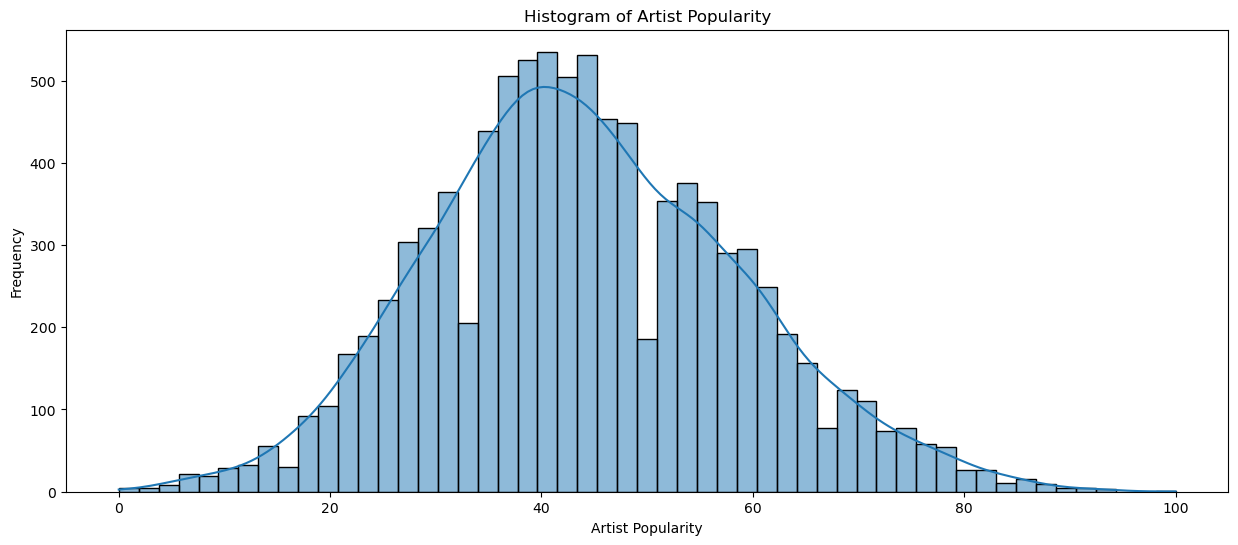

In [8]:
columns_to_plot = ['Artist Popularity']

for inputs in columns_to_plot:
    # Histograms of numeric input data
    plt.figure(figsize=(15, 6))
    sns.histplot(data=df, x=inputs, kde=True)
    plt.title('Histogram of '+ inputs)
    plt.xlabel(inputs)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# Normalization
data = df[['Artist Popularity']]
scaler = preprocessing.MinMaxScaler()
data_normalized = scaler.fit_transform(data)
df[['Artist Popularity Normalized']] = data_normalized

In [10]:
# Mean and standard deviation
mean = df['Artist Popularity Normalized'].mean()
std_dev =df['Artist Popularity Normalized'].std()

# Determining breakpoints
low_threshold = mean - std_dev
high_threshold = mean + std_dev

# Separating data into categories
df['Category'] = pd.cut(df['Artist Popularity Normalized'], bins=[-np.inf, low_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Showing the new column
sorted_df = df.sort_values(by='Artist Popularity', ascending=False)
sorted_df

,Track Name,Artist,Artist URI,Artist Popularity,Artist Genres,Track Duration(ms),Release Date,Track Popularity,Artist Popularity Normalized,Category
9196,Look What You Made Me Do,Taylor Swift,spotify:artist:06HL4z0CvFAxyc27GXpf02,100,pop,211859,2017-08-24,0,1.00,High
9808,One Dance,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,94,"canadian hip hop, canadian pop, hip hop, pop r...",173986,2016-05-06,90,0.94,High
9813,Blinding Lights,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,93,"canadian contemporary r&b, canadian pop, pop",200040,2020-03-20,91,0.93,High
9408,Sensualidad,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,93,"reggaeton, trap latino, urbano latino",297485,2017-11-03,72,0.93,High
9803,7 rings,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,92,pop,178626,2019-02-08,85,0.92,High
...,...,...,...,...,...,...,...,...,...,...
2857,My Tender,Alamein,spotify:artist:2r098bE7BKfCKn9M80XqxU,3,relaxative,298333,2005-01-01,15,0.03,Low
2719,Midnight Oil,California Breed,spotify:artist:7GwxVVJFS0SwwzQmhfoTtl,0,modern hard rock,285546,2014-05-19,0,0.00,Low
4939,Safety in Numbers,Jakob,spotify:artist:1rRk0aScbAjuf5lAnnTe6n,0,"instrumental post-rock, post-rock",473733,2006-09-12,0,0.00,Low
3078,A Chance for Peace,Lonnie Liston Smith and the Cosmic Echoes,spotify:artist:6EMR9xUcwYHrvpiSZKtN2c,0,jazz funk,320827,2012-09-24,0,0.00,Low


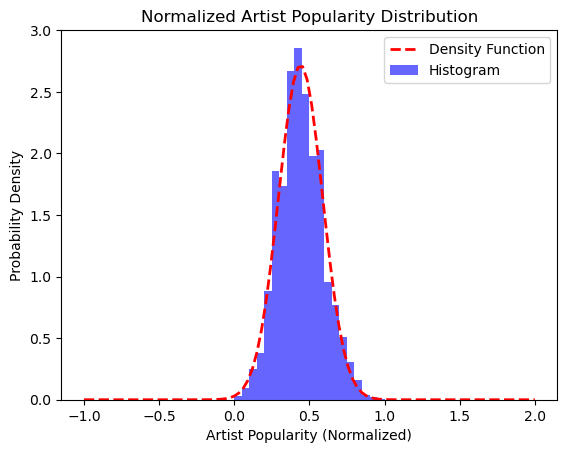

In [11]:
# Calculation of density function
x = np.linspace(-1, 2, 100)
y = norm.pdf(x, mean, std_dev)

# Histogram graph
plt.hist(data_normalized, bins=20, density=True, alpha=0.6, color='b')

# Graph of density function
plt.plot(x, y, 'r--', linewidth=2)

plt.xlabel('Artist Popularity (Normalized)')
plt.ylabel('Probability Density')
plt.title('Normalized Artist Popularity Distribution')
plt.legend(['Density Function', 'Histogram'])
plt.show()

In [12]:
# Converting categorical data to numerical values using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Category'])

# Converting numeric values to one-hot encoding using OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
onehot_encoded = onehot_encoder.fit_transform(encoded_labels.reshape(-1, 1))

# Conversion of one-hot encoded data to DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=label_encoder.classes_)

print("One-hot Coded Column:")
onehot_df

One-hot Coded Column:


C:\Users\suat\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,High,Low,Medium
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
9245,0,0,1
9246,1,0,0
9247,1,0,0
9248,1,0,0


In [13]:
# Joining dataframes by column
result = pd.concat([tf_df, onehot_df ], axis=1)
result

,21st century classical,5th wave emo,a cappella,aberdeen indie,abstract,abstract beats,abstract hip hop,acid house,acid jazz,acid rock,...,wyoming roots,yacht rock,yodeling,york indie,zambian hip hop,zolo,zouk,High,Low,Medium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(result, min_support=0.004, use_colnames=True)
frequent_itemsets

C:\Users\suat\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.007243,(acoustic pop)
1,0.008324,(adult standards)
2,0.020108,(album rock)
3,0.004973,(alt z)
4,0.005189,(alternative country)
...,...,...
849,0.004000,"(quiet storm, classic soul, soul, disco, Medium)"
850,0.004541,"(quiet storm, classic soul, soul, Medium, funk)"
851,0.004432,"(quiet storm, soul, disco, Medium, funk)"
852,0.004973,"(pop dance, edm, electro house, dutch house, p..."


In [15]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.008)

# Filtering rules where 'High', 'Medium', or 'Low' are the only consequents
association_rules = rules[rules['consequents'].apply(lambda x: len(x) == 1 and ('High' in x or 'Medium' in x or 'Low' in x))]
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(acoustic pop),(Medium),0.007243,0.674811,0.006054,0.835821,1.238600,0.001166,1.980698,0.194043
3,(adult standards),(Medium),0.008324,0.674811,0.005405,0.649351,0.962271,-0.000212,0.927391,-0.038034
25,(album rock),(High),0.020108,0.169622,0.008973,0.446237,2.630776,0.005562,1.499518,0.632605
27,(album rock),(Medium),0.020108,0.674811,0.011135,0.553763,0.820620,-0.002434,0.728737,-0.182389
28,(alternative country),(Medium),0.005189,0.674811,0.004432,0.854167,1.265787,0.000931,2.229869,0.211073
...,...,...,...,...,...,...,...,...,...,...
3209,"(funk, classic soul, quiet storm, disco)",(Medium),0.004216,0.674811,0.004108,0.974359,1.443899,0.001263,12.682378,0.308733
3237,"(soul, classic soul, quiet storm, disco)",(Medium),0.004324,0.674811,0.004000,0.925000,1.370755,0.001082,4.335856,0.271649
3267,"(funk, soul, classic soul, quiet storm)",(Medium),0.004973,0.674811,0.004541,0.913043,1.353036,0.001185,3.739676,0.262226
3296,"(funk, soul, quiet storm, disco)",(Medium),0.004757,0.674811,0.004432,0.931818,1.380858,0.001223,4.769441,0.277131


In [16]:
# Displaying association rules sorted by lift
association_rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2888,"(rap, hip hop, pop rap)",(High),0.004649,0.169622,0.004649,1.000000,5.895475,0.003860,inf,0.834257
1563,"(hip hop, pop rap)",(High),0.004973,0.169622,0.004973,1.000000,5.895475,0.004129,inf,0.834528
1568,"(rap, hip hop)",(High),0.008865,0.169622,0.008757,0.987805,5.823579,0.007253,68.091027,0.835693
1737,"(rap, pop rap)",(High),0.007135,0.169622,0.006919,0.969697,5.716824,0.005709,27.402486,0.831007
2955,"(pop rap, rap, trap)",(High),0.004757,0.169622,0.004541,0.954545,5.627499,0.003734,18.268324,0.826231
...,...,...,...,...,...,...,...,...,...,...
410,(modern rock),(Medium),0.016216,0.674811,0.006595,0.406667,0.602638,-0.004348,0.548072,-0.401284
475,(permanent wave),(Medium),0.011243,0.674811,0.004216,0.375000,0.555711,-0.003371,0.520303,-0.447082
605,(trap),(Medium),0.016324,0.674811,0.005838,0.357616,0.529950,-0.005178,0.506222,-0.474152
329,(hip hop),(Medium),0.016432,0.674811,0.004757,0.289474,0.428970,-0.006332,0.457674,-0.575084
